# GRIP : Sparks Foundation

<h3>Data Science and Business Analytics Intern</h3>

<h3>Task 1: Prediction using Supervised Machine Learning</h3>

<h3>Name : Ganesh Bhaip</h3>
<h4>Batch : GRIPOCT21</h4>

<h4> In this task we have to predict the percentage score of a student based on the no of hours studied</h4> 

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<h3>Read data from URL</h3>

In [2]:
#Read Data
url = "http://bit.ly/w-data"
Stud_Data = pd.read_csv(url)
print("Data imported successfully from url")

Data imported successfully from url


In [3]:
Stud_Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>Exploring Data</h3>

In [4]:
Stud_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Stud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print(Stud_Data.shape)
Stud_Data.head(10) # shows first 10 records

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h3>Input Data Visualization</h3>

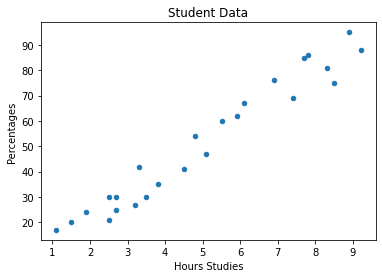

In [7]:
# Plotting the distribution of scores
Stud_Data.plot(kind ='scatter', x='Hours', y="Scores")
plt.xlabel("Hours Studies")  
plt.ylabel("Percentages") 
plt.title("Student Data") 
plt.show()

In [8]:
Stud_Data.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
Stud_Data.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
hours=Stud_Data['Hours']
scores= Stud_Data['Scores']

In [11]:
#sns.distplot(hours)

In [12]:
#sns.distplot(scores)

<h3>Linear Regression</h3>

In [13]:
#Python iloc() function enables us to select a particular cell of the dataset
#iloc[:,start_col:end_col]

X = Stud_Data.iloc[:, :-1].values  
Y = Stud_Data.iloc[:, 1].values  

print('Hours studied',X)
print('Percentage Score',Y)

Hours studied [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Percentage Score [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### As our data now has been divided in two parts now we need to split it in training & test set

### We will use the inbuild library Scikit-Learn's to train & test set


In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

# Training the Algorithm

In [15]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


<h4>training is completed we need to plot the line of regression</h4>

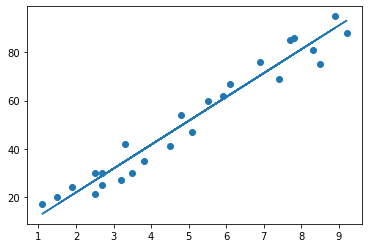

In [16]:
# Plotting the regression line

m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Making Prediction

In [17]:
print(X_test) # Testing data - In Hours
Y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
dataframe 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Estimating training and test score

print("Training Score:",reg.score(X_train,Y_train))
print("Test Score:",reg.score(X_test,Y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


<h4>Plotting the Bar graph to depict the difference between the actual and predicted value</h4>

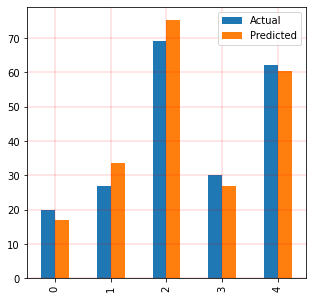

In [20]:
dataframe.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.2', color='red')
plt.grid(which='minor', linewidth='0.2', color='blue')
plt.show()

In [21]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluting the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


 R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model

<h3>Conclusion</h3>

<h4>At the end of the task i was successfully able to carry-out prediction using 
Supervised Machine Learning task and able to evaluate the model's performance on various parameters.</h4>

<h3>Thank You...</h3>